# Autism Prediction Model

## Importing the required Dependencies.

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings("ignore")
plt.style.use("ggplot")

from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [60]:
# !pip show numpy
# !pip show pandas
# !pip show scikit-learn
# !pip show flask
# !pip show matplotlib
# !pip show seaborn
# !pip install gunicorn

## Data Collection and Loading.

In [61]:
dataset = pd.read_csv("datasets/dataset.csv")

In [62]:
dataset.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38.172746,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47.750517,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7.380373,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23.561927,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43.205790,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [63]:
dataset.tail()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
795,796,0,1,0,0,0,0,0,0,1,1,16.597187,m,Hispanic,no,no,New Zealand,no,12.999501,18 and more,Self,0
796,797,0,1,1,0,0,1,0,1,1,1,20.703001,m,White-European,no,no,Cyprus,no,13.561518,18 and more,Self,0
797,798,0,0,0,0,0,0,0,0,0,0,5.711481,m,South Asian,yes,no,New Zealand,no,2.653177,18 and more,Self,0
798,799,0,0,0,0,0,0,0,0,0,0,16.414305,f,?,no,no,Canada,no,9.069342,18 and more,Self,0
799,800,0,1,0,0,0,0,0,0,0,0,46.966113,f,?,no,no,United Arab Emirates,yes,2.243304,18 and more,Self,0


In [64]:
# It will display all the columns sometime pandas create the problem.
pd.set_option("display.max_columns", None)

In [65]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [66]:
#  Convert the Age column datatype to the int 
dataset["age"] = dataset["age"].astype(int)

In [67]:
dataset.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [68]:

#  we need to print only the multiclass or binary class data feature.
non_distinct = ["ID", "age", "result"]
for i in dataset.columns:
    if i not in non_distinct:
        print(i, dataset[i].unique())
        print('-' * 50)

A1_Score [1 0]
--------------------------------------------------
A2_Score [0 1]
--------------------------------------------------
A3_Score [1 0]
--------------------------------------------------
A4_Score [0 1]
--------------------------------------------------
A5_Score [1 0]
--------------------------------------------------
A6_Score [0 1]
--------------------------------------------------
A7_Score [1 0]
--------------------------------------------------
A8_Score [0 1]
--------------------------------------------------
A9_Score [1 0]
--------------------------------------------------
A10_Score [1 0]
--------------------------------------------------
gender ['f' 'm']
--------------------------------------------------
ethnicity ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
--------------------------------------------------
jaundice ['no' 'yes']
--------------------------------------------------
austim

In [69]:
#  drop the id and the age description column because it does not give any kind of insights.
dataset = dataset.drop(columns=["ID", "age_desc"], axis=1)

In [70]:
dataset.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,Self,0
2,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,Self,1
3,0,0,0,0,0,0,0,0,0,0,23,f,?,no,no,United States,no,2.276617,Self,0
4,0,0,0,0,0,0,0,0,0,0,43,m,?,no,no,South Africa,no,-4.777286,Self,0


In [71]:
dataset.shape

(800, 20)

In [72]:
dataset.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [73]:
len(dataset["contry_of_res"].unique())

56

In [74]:
dataset["contry_of_res"].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Viet Nam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'AmericanSamoa', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'Hong Kong',
       'Angola', 'China', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

In [75]:
#  Define the mappping dictionary for the country names.
mapping = {
"Viet Nam" : "Vietnam",
"AmericanSamoa" : "United States",
"Hong Kong": "China",
}
dataset["contry_of_res"] = dataset["contry_of_res"].replace(mapping)

In [76]:
dataset["contry_of_res"].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Vietnam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'Bahamas', 'Saudi Arabia', 'Ireland', 'Aruba',
       'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan', 'Armenia',
       'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'China', 'Angola',
       'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran', 'Argentina',
       'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone', 'Czech Republic',
       'Niger', 'Romania', 'Cyprus', 'Belgium', 'Burundi', 'Bangladesh'],
      dtype=object)

In [77]:
#  Target Class distribution.
dataset["Class/ASD"].value_counts()

Class/ASD
0    639
1    161
Name: count, dtype: int64

### Insights we got here.
1. Missing Value in ethinicity & relation.
2. age_desc column hasonly 1 unique value and not important for the output.
4. Fixed Country names.
5. Identified the imbalanced data in the target column.

### EDA :- Exploratory Data Analysis

In [78]:
dataset.shape

(800, 20)

In [79]:
dataset.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,27.963750,8.537303,0.201250
std,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.329827,4.807676,0.401185
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-6.137748,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,5.306575,0.000000
50%,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.000000,9.605299,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.250000,12.514484,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,15.853126,1.000000


## Univarient Analysis.
Numerical Columns.                                                            
-> Age                                                                        
-> Result

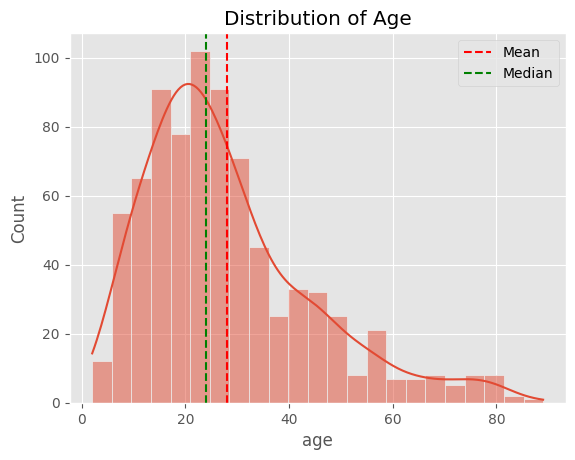

In [80]:
sns.histplot(dataset.age, kde = True)
plt.title("Distribution of Age")

# calculate the mean and the median.
age_mean = dataset.age.mean()
age_median = dataset.age.median()

#  add vertical line for the mean and the median.
plt.axvline(age_mean, color = "red", linestyle ="--", label = "Mean")
plt.axvline(age_median, color = "green", linestyle ="--", label = "Median")

plt.legend()
plt.show()

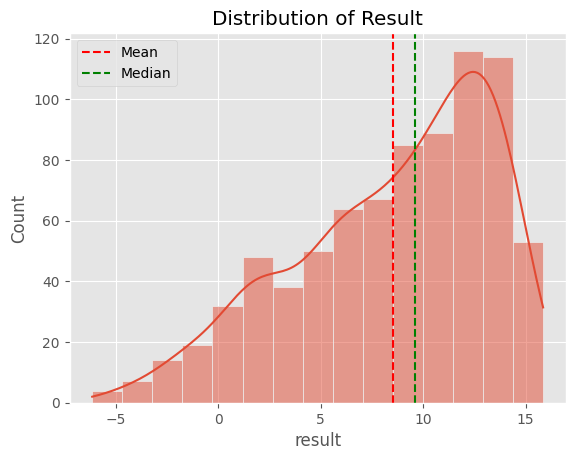

In [81]:
sns.histplot(dataset.result, kde = True)
plt.title("Distribution of Result")

# calculate the mean and the median.
age_mean = dataset.result.mean()
age_median = dataset.result.median()

#  add vertical line for the mean and the median.
plt.axvline(age_mean, color = "red", linestyle ="--", label = "Mean")
plt.axvline(age_median, color = "green", linestyle ="--", label = "Median")

plt.legend()
plt.show()

#  This is the left skewed Structure.

##  Box PLot for identifyuing outliers in the numerical Columns.

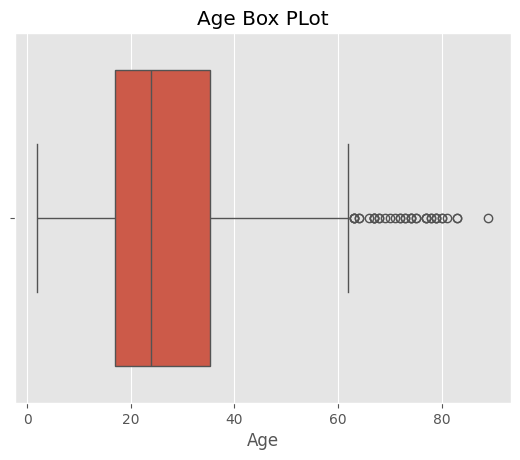

In [82]:
#  Box PLot.
sns.boxplot(x = dataset["age"])
plt.title("Age Box PLot")
plt.xlabel("Age")
plt.show()

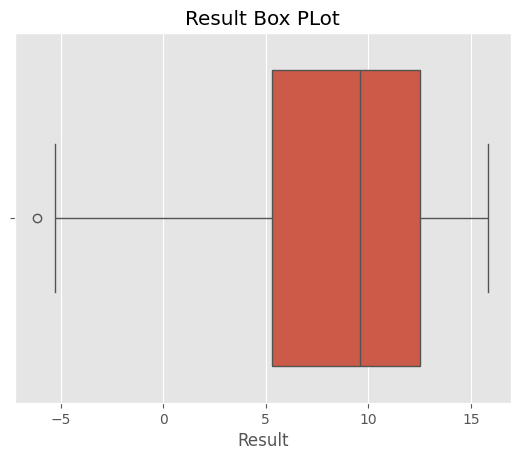

In [83]:
#  Box plot for the Result Column.
#  Box PLot.
sns.boxplot(x = dataset["result"])
plt.title("Result Box PLot")
plt.xlabel("Result")
plt.show()

In [84]:
# dataset.result.sort_values(ascending=False)
dataset.age.sort_values(ascending=False)

654    89
705    83
535    83
348    81
354    80
       ..
331     5
456     4
216     3
536     3
317     2
Name: age, Length: 800, dtype: int32

In [85]:
#  Count the Outlier Using the IQR Method.
Q1 = dataset["age"].quantile(0.25)
Q3 = dataset["age"].quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

age_outliers = dataset[(dataset["age"] < lower_bound) | (dataset["age"] > upper_bound)]

In [86]:
len(age_outliers)

39

In [87]:
#  Count the Outlier Using the IQR Method.
Q1 = dataset["result"].quantile(0.25)
Q3 = dataset["result"].quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

result_outliers = dataset[(dataset["result"] < lower_bound) | (dataset["result"] > upper_bound)]

In [88]:
len(result_outliers)

1

## Univarient Analysis for the categorical variable.

In [89]:
dataset.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [90]:
dataset.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

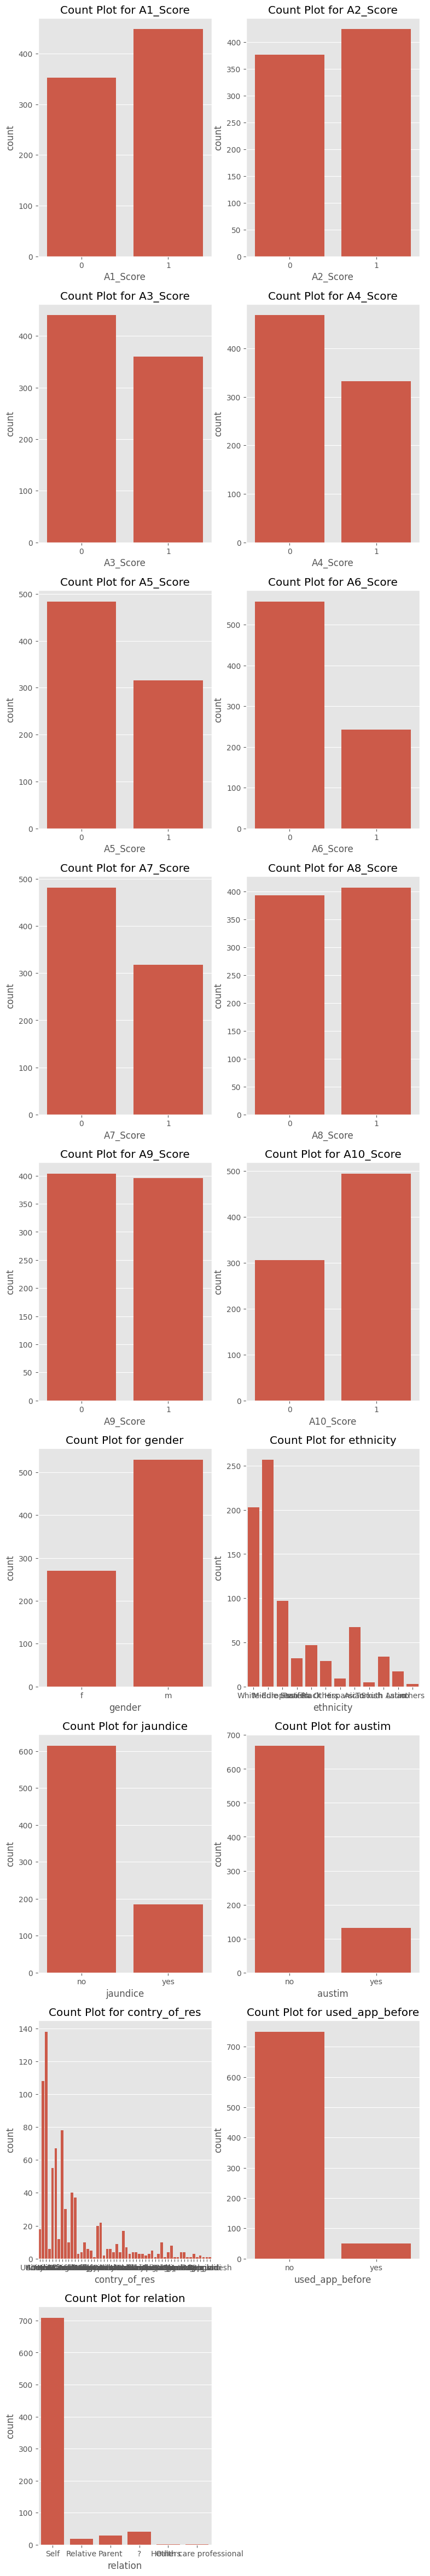

In [91]:
categorical_col = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
        'relation']

plt.figure(figsize=(9,60))
for i,col in enumerate(categorical_col):
    plt.subplot(9,2,i + 1)
    sns.countplot(x = dataset[col])
    plt.title(f"Count Plot for {col}")
    plt.xlabel(col)
plt.show()

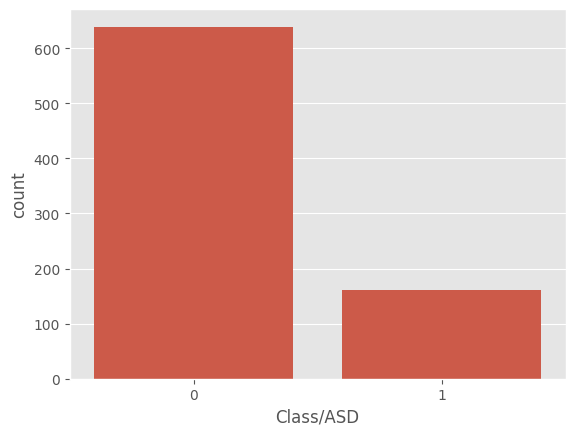

In [92]:
#  count plot for the target column.
sns.countplot(x = dataset["Class/ASD"])
plt.show()

In [93]:
dataset.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,Self,0
2,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,Self,1
3,0,0,0,0,0,0,0,0,0,0,23,f,?,no,no,United States,no,2.276617,Self,0
4,0,0,0,0,0,0,0,0,0,0,43,m,?,no,no,South Africa,no,-4.777286,Self,0


In [94]:
dataset["Class/ASD"].value_counts()

Class/ASD
0    639
1    161
Name: count, dtype: int64

In [95]:
dataset.ethnicity.value_counts()

ethnicity
White-European     257
?                  203
Middle Eastern      97
Asian               67
Black               47
South Asian         34
Pasifika            32
Others              29
Latino              17
Hispanic             9
Turkish              5
others               3
Name: count, dtype: int64

In [96]:
#  Handle the question mark into the Ethinicity and the Relation column.
dataset.replace({"ethnicity" : {"?" : "Others", "others" : "Others"}}, inplace = True)

In [97]:
dataset.ethnicity.value_counts()

ethnicity
White-European     257
Others             235
Middle Eastern      97
Asian               67
Black               47
South Asian         34
Pasifika            32
Latino              17
Hispanic             9
Turkish              5
Name: count, dtype: int64

In [98]:
dataset.relation.unique()

array(['Self', 'Relative', 'Parent', '?', 'Others',
       'Health care professional'], dtype=object)

In [99]:
dataset.replace({"relation": {"?" : "Others", "Relative" : "Others", "Parent": "Others" , "Health care professional" : "Others"}}, inplace=True)

In [100]:
dataset.relation.unique()

array(['Self', 'Others'], dtype=object)

In [101]:
dataset.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,Others,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,Others,no,no,India,no,2.255185,Self,0
2,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,Self,1
3,0,0,0,0,0,0,0,0,0,0,23,f,Others,no,no,United States,no,2.276617,Self,0
4,0,0,0,0,0,0,0,0,0,0,43,m,Others,no,no,South Africa,no,-4.777286,Self,0


## Label Encoding 

In [102]:
# dataset.to_csv("cleaned_data.csv")

In [103]:
encoding_features = dataset.select_dtypes(include="object").columns

In [104]:
#  Iterate the Loop to perform the Label Encoding into the categorical feature.

save_label_encoded = {}
for i in encoding_features:
    encoder = LabelEncoder()
    dataset[i] = encoder.fit_transform(dataset[i])
    save_label_encoded[i] = encoder           # save the encoder with their respective feature

#  save the encoding into the pickle format
# pickle.dump(save_label_encoded, open("label_encoder.pkl", "wb"))
pickle.dump(encoder, open("label_encoder.pkl", "wb"))

In [105]:
save_label_encoded

{'gender': LabelEncoder(),
 'ethnicity': LabelEncoder(),
 'jaundice': LabelEncoder(),
 'austim': LabelEncoder(),
 'contry_of_res': LabelEncoder(),
 'used_app_before': LabelEncoder(),
 'relation': LabelEncoder()}

In [106]:
load_label_encoded = pickle.load(open("label_encoder.pkl", "rb"))

## Bivarient Analysis.

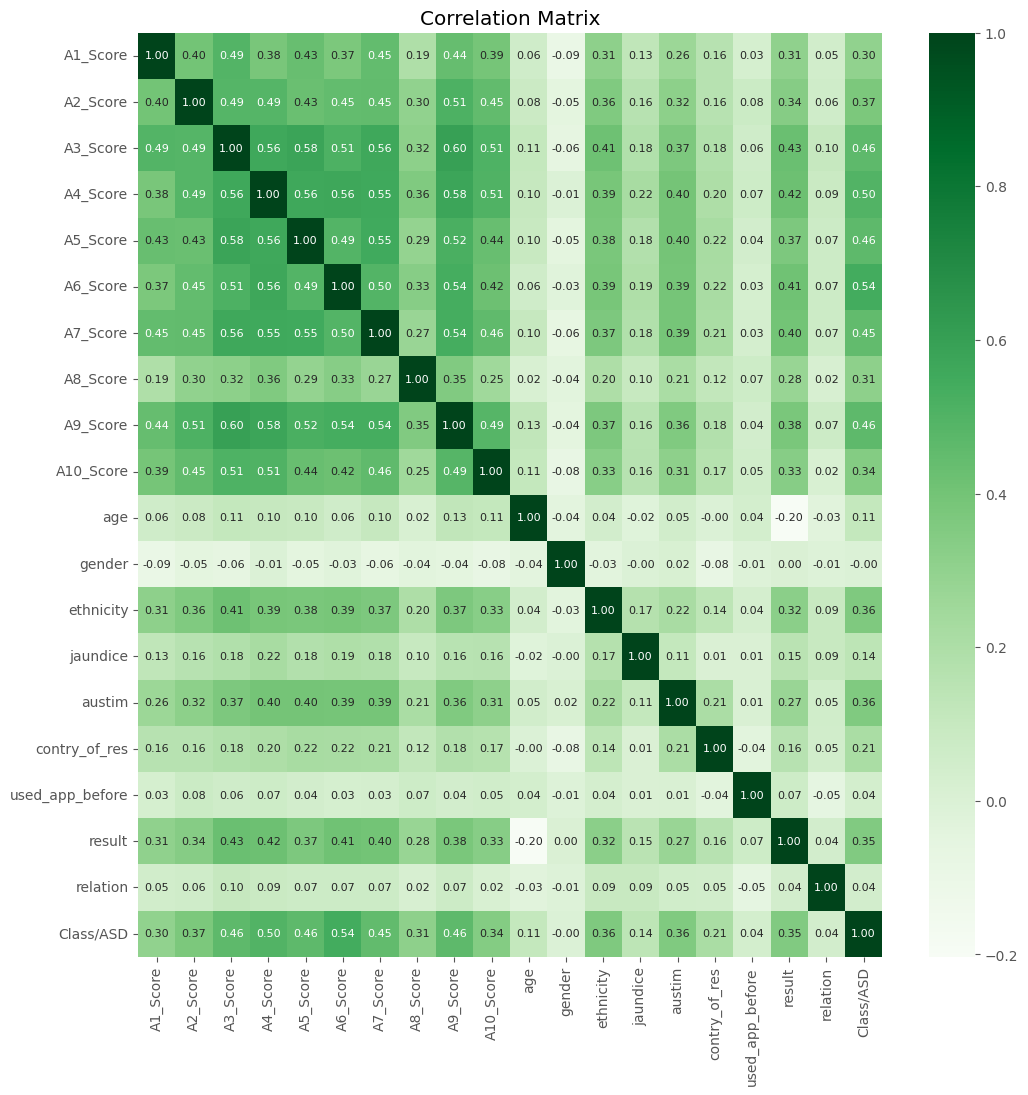

In [107]:
#  Correlation Matrix.
plt.figure(figsize=(12,12))
sns.heatmap(dataset.corr(), annot=True, annot_kws={"size" :8}, fmt=".2f", cmap="Greens")
plt.title("Correlation Matrix")
plt.show()

#  we dont have the highly correlative positive and the negative correlated columns to need to be removed.

## Data Insights from the EDA 
1. Few outliers into the numerical columns (age and the result)
2. Class Imbalance in the target column.
3. class imbalance in the categorical features.
4. We don't have any highly correlated column.
5. Performed label encoding on the features.

## Data Preprocessing.

### Handling the Outliers.

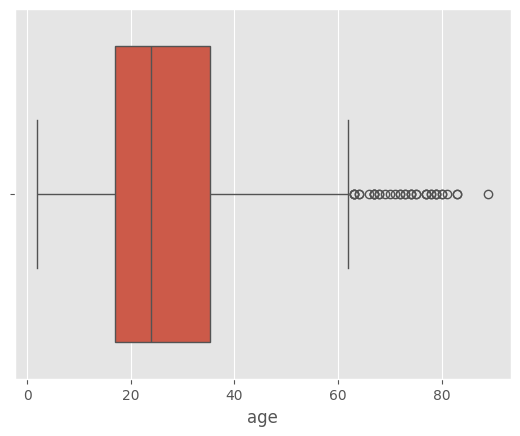

In [108]:
sns.boxplot(x = dataset.age)
plt.show()

In [109]:
#  Remove the outliers from the median of the feature.
def outlier_replace_median(dataset,column):
    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)

    IQR = Q3 - Q1

    #  find the lower and the upper bound of the boxplot.
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    median = dataset[column].median()

    #  replace with the median
    dataset[column] = dataset[column].apply(lambda val:median if val < lower_bound or val > upper_bound else val)
    return dataset

In [110]:
#  Replace Outliers in the Age Column.
dataset = outlier_replace_median(dataset, "age")
#  Replace Outliers in the result Column.
dataset = outlier_replace_median(dataset, "result")

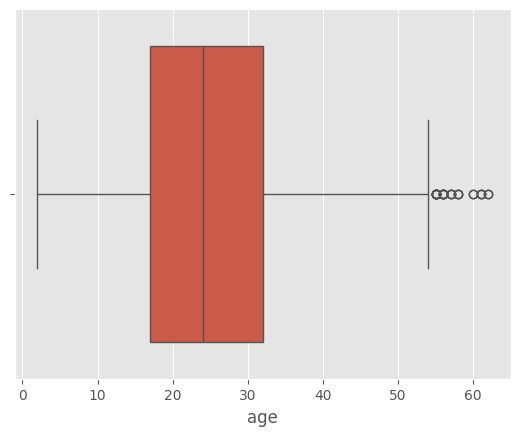

In [111]:
sns.boxplot(x = dataset.age)
plt.show()

## Splitting the dataset into the dependent and the independent Variable.

In [112]:
x = dataset.drop("Class/ASD", axis=1)
y = dataset["Class/ASD"]             

In [113]:
## Splitting the dataset into the training and the testing part.
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [114]:
print(x.shape, x_train.shape, y_train.shape)

(800, 19) (640, 19) (640,)


In [115]:
y_train.value_counts()
#  we have the imbalanced data into the y_train

Class/ASD
0    515
1    125
Name: count, dtype: int64

In [116]:
# Implement the SMOTE for handling the problem of the Imbalance data.
smote = SMOTE(k_neighbors=5)

In [117]:
x_smote_train, y_smote_train = smote.fit_resample(x_train, y_train)

In [118]:
print(y_train.value_counts())
print(y_smote_train.value_counts())

Class/ASD
0    515
1    125
Name: count, dtype: int64
Class/ASD
1    515
0    515
Name: count, dtype: int64


In [122]:
## Model Training and Implementation.
models = {
    "Logistic Regression": LogisticRegression(random_state=20),
    "K Nearest Neighbour" : KNeighborsClassifier(),
    "SVC" : SVC(random_state=20),
    "Decision Tree Classifier" : DecisionTreeClassifier(random_state=20),
    "Random Forest Classifier" : RandomForestClassifier(random_state=20),
    "Gradient Boost Classifier" : GradientBoostingClassifier(random_state=20),
    # "XGB Classifier" : XGBClassifier(),
}

In [123]:
#  we need to perform and find the cross validation score for all the models.
cv_score = {}

for model_name, model in models.items():
    print(f"Training {model_name} with default parameter")
    scores = cross_val_score(model, x_smote_train, y_smote_train, cv = 5, scoring="accuracy")
    cv_score[model_name] = scores
    print(f"{model_name} Cross Validation Accuracy: {scores.mean()}")
    print("-" * 60)                                                  

Training Logistic Regression with default parameter
Logistic Regression Cross Validation Accuracy: 0.8300970873786409
------------------------------------------------------------
Training K Nearest Neighbour with default parameter
K Nearest Neighbour Cross Validation Accuracy: 0.8621359223300971
------------------------------------------------------------
Training SVC with default parameter
SVC Cross Validation Accuracy: 0.8281553398058252
------------------------------------------------------------
Training Decision Tree Classifier with default parameter
Decision Tree Classifier Cross Validation Accuracy: 0.8514563106796116
------------------------------------------------------------
Training Random Forest Classifier with default parameter
Random Forest Classifier Cross Validation Accuracy: 0.9116504854368934
------------------------------------------------------------
Training Gradient Boost Classifier with default parameter
Gradient Boost Classifier Cross Validation Accuracy: 0.8951

## Model Selection and Hyperparameter Tuning

Logistic regression

In [ ]:
model1 = LogisticRegression(C=0.9)

In [ ]:
model1.fit(x_smote_train, y_smote_train)

In [ ]:
print("The Training accuracy are:- ", accuracy_score(model1.predict(x_smote_train), y_smote_train))
model1_acc = accuracy_score(model1.predict(x_test), y_test)
print("The testing accuracy are:- ", accuracy_score(model1.predict(x_test), y_test))
print("The classification report are:- ", classification_report(model1.predict(x_test), y_test))
print("The confusion metrics are:- ", confusion_matrix(model1.predict(x_test), y_test))

K Nearest Neighbour

In [ ]:
model2 = KNeighborsClassifier()

In [ ]:
model2.fit(x_smote_train, y_smote_train)

In [ ]:
print("The Training accuracy are:- ", accuracy_score(model2.predict(x_smote_train), y_smote_train))
model2_acc = accuracy_score(model2.predict(x_test), y_test)
print("The testing accuracy are:- ", accuracy_score(model2.predict(x_test), y_test))
print("The classification report are:- ", classification_report(model2.predict(x_test), y_test))
print("The confusion metrics are:- ", confusion_matrix(model2.predict(x_test), y_test))

SV Classifier

In [ ]:
model3 = SVC()

parameters_tuning = {
    "C":[1,2,3],
    "degree":[1,2,3],
    "gamma":['scale','auto'],}

grid_search = GridSearchCV(model3, parameters_tuning, cv = 5)
grid_search.fit(x_smote_train, y_smote_train)

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_score_

In [ ]:
model3 = SVC(C =1,degree=2, gamma="auto")
model3.fit(x_smote_train, y_smote_train)

In [ ]:
print("The Training accuracy are:- ", accuracy_score(model3.predict(x_smote_train), y_smote_train))
model3_acc = accuracy_score(model3.predict(x_test), y_test)
print("The testing accuracy are:- ", accuracy_score(model3.predict(x_test), y_test))
print("The classification report are:- ", classification_report(model3.predict(x_test), y_test))
print("The confusion metrics are:- ", confusion_matrix(model3.predict(x_test), y_test))

Decision Tree Classifier

In [ ]:
model4 = DecisionTreeClassifier()

decision_parameter = {
    'splitter': ['best', 'random'],
    'criterion': ['gini', 'entropy'],            # Splitting criterion
    'max_depth': [1,3, 5,7,10],              # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],              # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]                 # Minimum number of samples required at a leaf node
}

grid_search = GridSearchCV(model4, decision_parameter, cv=5)
grid_search.fit(x_smote_train, y_smote_train)

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_score_

In [ ]:
model4 = DecisionTreeClassifier(criterion="gini", max_depth=10,min_samples_leaf=1, min_samples_split=5, splitter="random")

In [ ]:
model4.fit(x_smote_train, y_smote_train)

In [ ]:
print("The Training accuracy are:- ", accuracy_score(model4.predict(x_smote_train), y_smote_train))
model4_acc = accuracy_score(model4.predict(x_test), y_test)
print("The testing accuracy are:- ", accuracy_score(model4.predict(x_test), y_test))
print("The classification report are:- ", classification_report(model4.predict(x_test), y_test))
print("The confusion metrics are:- ", confusion_matrix(model4.predict(x_test), y_test))

Random Forest Algorithms.

In [ ]:
model5 = RandomForestClassifier()

random_parameter = {
    'n_estimators': [150, 200],             # Number of trees in the forest
    'criterion': ['gini', 'entropy'],            # Splitting criterion
    'max_depth': [1,5,7,12,15],              # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],              # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],                # Minimum number of samples required at a leaf node
}

grid_search = GridSearchCV(model5, random_parameter, cv=5)
grid_search.fit(x_smote_train,y_smote_train)

In [ ]:
# grid_search.best_params_

In [ ]:
# grid_search.best_score_

In [ ]:
model5 = RandomForestClassifier(n_estimators=200, criterion="gini", max_depth=6)
model5.fit(x_smote_train, y_smote_train)

In [ ]:
print("The Training accuracy are:- ", accuracy_score(model5.predict(x_smote_train), y_smote_train))
model5_acc = accuracy_score(model5.predict(x_test), y_test)
print("The testing accuracy are:- ", accuracy_score(model5.predict(x_test), y_test))
print("The classification report are:- ", classification_report(model5.predict(x_test), y_test))
print("The confusion metrics are:- ", confusion_matrix(model5.predict(x_test), y_test))

In [ ]:
y_test.value_counts()

Gradient Boost Algorithms.

In [ ]:
model6 = GradientBoostingClassifier(learning_rate=0.01,n_estimators=400, max_depth=5)
model6.fit(x_smote_train, y_smote_train)

In [ ]:
print("The Training accuracy are:- ", accuracy_score(model6.predict(x_smote_train), y_smote_train))
model6_acc = accuracy_score(model5.predict(x_test), y_test)
print("The testing accuracy are:- ", accuracy_score(model6.predict(x_test), y_test))
print("The classification report are:- ", classification_report(model6.predict(x_test), y_test))
print("The confusion metrics are:- ", confusion_matrix(model6.predict(x_test), y_test))

#  This is the model is Overfitted.

XGB Classifier

In [ ]:
model7 = XGBClassifier(n_estimators = 400, max_depth = 5, learning_rate = 0.01, subsample = 0.7, colsample_bytree = 0.2)

# parameters = {
#     "n_estimators": [50, 100, 200, 500],
#     "max_depth": [3, 5, 7, 10],
#     "learning_rate": [0.01, 0.1, 0.2, 0.3],
#     "subsample": [0.5, 0.7, 1.0],
#     "colsample_bytree": [0.5, 0.7, 1.0]
# }    

In [ ]:
# grid_search = GridSearchCV(model7, parameters, cv = 5)

In [ ]:
# grid_search.fit(x_smote_train, y_smote_train)

In [ ]:
model7.fit(x_smote_train, y_smote_train)

In [ ]:
print("The Training accuracy are:- ", accuracy_score(model7.predict(x_smote_train), y_smote_train))
model7_acc = accuracy_score(model7.predict(x_test), y_test)
print("The testing accuracy are:- ", accuracy_score(model7.predict(x_test), y_test))
print("The classification report are:- ", classification_report(model7.predict(x_test), y_test))
print("The confusion metrics are:- ", confusion_matrix(model7.predict(x_test), y_test))

#  This is the model is Overfitted.

In [ ]:
#  Here we check the Model Comparision
model_comp = pd.DataFrame({
    "Models": [
    "Logistic Regression",
    "K Nearest Neighbour",
    "SVC",
    "Decision Tree Classifier",
    "Random Forest Classifier",
    "Gradient Boost Classifier",
    "XGB Classifier"
],
    "Accuracy": [model1_acc * 100,model2_acc*100,model3_acc*100,model4_acc*100,model5_acc*100,model6_acc*100,model7_acc*100],
})
model_comp.sort_values("Accuracy", ascending=False)

In [ ]:
#  Save the best model in the form of the Pickle.
import pickle

In [ ]:
try:
    with open("best_model.pkl", "wb") as f:
        pickle.dump(model5, f)
except:
    print("Some thing went Wrong")
else:
    print("Model Saved Successfully")

In [ ]:
#  Load the Model.
bestModel = pickle.load(open("best_model.pkl","rb"))
bestModel

In [ ]:
# x_test.head(50)
# y_test.head(50)
x_test.head(1)

In [ ]:
#  Build the Predictive System.
prediction = bestModel.predict([[1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	13.0,	1	,9	,0	,1	,52,	0,	12.462061	,1]])

if prediction[0] == 0:
    print("The person dont have Autism")
else:
    print("The person have the Autism")